<a href="https://colab.research.google.com/github/raulito100/neue_Assignment/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/salaries.csv')


###1. Data Exploration and Manipulation###

In [6]:
# 1. Dataset Overview
print(df.head())
print(df.shape)
print (df.columns)

       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500
(397, 6)
Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')


In [7]:
# Check data types
print(df.dtypes)

# Select categorical columns (possible classification targets)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

# Select numerical columns (possible regression targets)
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)


rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object
Categorical columns: Index(['rank', 'discipline', 'sex'], dtype='object')
Numerical columns: Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')


Since this Assignment is about Regression Models, our target variables will be "yrs.since.phd", "yrs.service", "salary".

In [8]:
# 2. Check for Missing Values

null_counts = df.isnull().sum()
print("Missing values per column:\n", null_counts)


Missing values per column:
 rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [9]:
# 3. Convert Categorical Variables

# As seen in Task 1 the categorical columns are "rank", "discipline" and "sex".

# Convert categorical variables into dummy variables
# Example: Automatic encoding for all categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns)


In [12]:
print(df_dummies)

     yrs.since.phd  yrs.service  salary  rank_AssocProf  rank_AsstProf  \
0               19           18  139750           False          False   
1               20           16  173200           False          False   
2                4            3   79750           False           True   
3               45           39  115000           False          False   
4               40           41  141500           False          False   
..             ...          ...     ...             ...            ...   
392             33           30  103106           False          False   
393             31           19  150564           False          False   
394             42           25  101738           False          False   
395             25           15   95329           False          False   
396              8            4   81035           False           True   

     rank_Prof  discipline_A  discipline_B  sex_Female  sex_Male  
0         True         False          True  

                yrs.since.phd  yrs.service    salary  rank_AssocProf  \
yrs.since.phd        1.000000     0.909649  0.419231       -0.233721   
yrs.service          0.909649     1.000000  0.334745       -0.191074   
salary               0.419231     0.334745  1.000000       -0.287378   
rank_AssocProf      -0.233721    -0.191074 -0.287378        1.000000   
rank_AsstProf       -0.602513    -0.528702 -0.490502       -0.197537   
rank_Prof            0.662719     0.570572  0.615458       -0.624702   
discipline_A         0.218087     0.164599 -0.156084       -0.043720   
discipline_B        -0.218087    -0.164599  0.156084        0.043720   
sex_Female          -0.148788    -0.153740 -0.138610        0.085450   
sex_Male             0.148788     0.153740  0.138610       -0.085450   

                rank_AsstProf  rank_Prof  discipline_A  discipline_B  \
yrs.since.phd       -0.602513   0.662719      0.218087     -0.218087   
yrs.service         -0.528702   0.570572      0.164599     -0.1

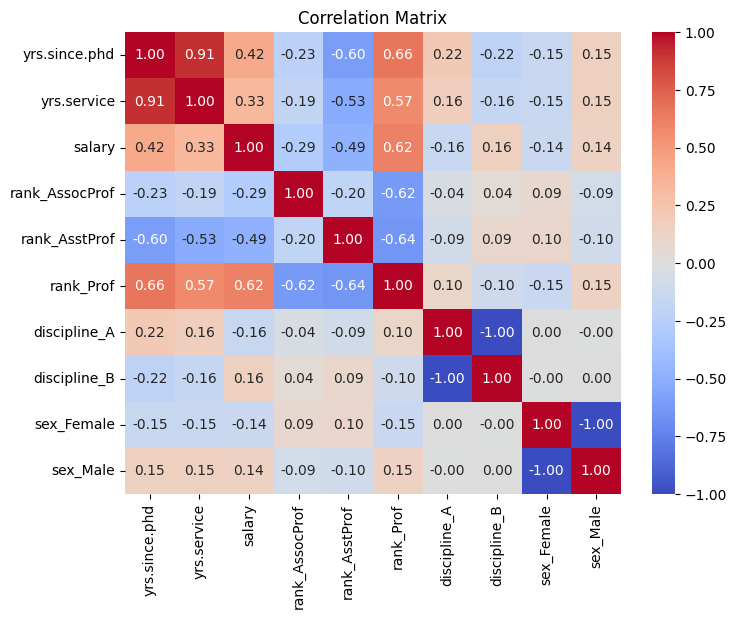

In [10]:
# 4. Correalation Analysis
correlation_matrix = df_dummies.corr()
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix')
plt.show()


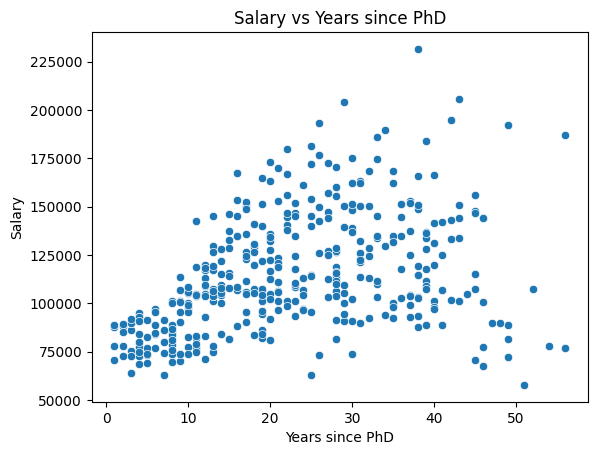

In [11]:
# Additional Visualization
sns.scatterplot(data=df, x='yrs.since.phd', y='salary')

plt.title('Salary vs Years since PhD')
plt.xlabel('Years since PhD')
plt.ylabel('Salary')
plt.show()

You can notice a positive correlation between the salary earned and the years passed since when a person archieved there PhD. This means that your salary usually growth with more years since getting the PhD degree.

###2. Multilinear Regression Model###

In [12]:
# 1. Preprocessing
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['yrs.since.phd', 'yrs.service','salary']
scaler = StandardScaler()

# Apply scaler only to numerical columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("\nPartially Standardized Dataset:")
print(df)




Partially Standardized Dataset:
         rank discipline  yrs.since.phd  yrs.service   sex    salary
0        Prof          B      -0.257550     0.029669  Male  0.860919
1        Prof          B      -0.179854    -0.124300  Male  1.966672
2    AsstProf          B      -1.422982    -1.125098  Male -1.122495
3        Prof          B       1.762533     1.646343  Male  0.042760
4        Prof          B       1.374055     1.800312  Male  0.918768
..        ...        ...            ...          ...   ...       ...
392      Prof          A       0.830187     0.953483  Male -0.350418
393      Prof          A       0.674796     0.106654  Male  1.218396
394      Prof          A       1.529446     0.568560  Male -0.395640
395      Prof          A       0.208623    -0.201284  Male -0.607502
396  AsstProf          A      -1.112200    -1.048113  Male -1.080017

[397 rows x 6 columns]


In [13]:
# 2. Model Creation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X = df[['yrs.since.phd', 'yrs.service']]  # Features
y = df['salary']  # Target

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [ 0.64375549 -0.18893713]
Intercept: 0.009887542379578068


In [14]:
# 3. Model Summary
import statsmodels.api as sm

# Train the model
model = sm.OLS(y, X_standardized).fit()

# Print the regression summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 salary   R-squared (uncentered):                   0.188
Model:                            OLS   Adj. R-squared (uncentered):              0.184
Method:                 Least Squares   F-statistic:                              45.83
Date:                Mon, 25 Nov 2024   Prob (F-statistic):                    1.26e-18
Time:                        13:27:13   Log-Likelihood:                         -521.90
No. Observations:                 397   AIC:                                      1048.
Df Residuals:                     395   BIC:                                      1056.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
# 4. Make Predictions
y_pred = model.predict(X_test)
print("Predictions on Test Data:")
print(y_pred)

Predictions on Test Data:
[-0.16659381  0.07904681 -0.54969201 -0.48795576  0.31657201 -0.39404702
  0.31461546 -0.73490075 -0.37455525  0.36888846 -0.23093879  0.42801597
  0.18172316  0.05013524  0.27367535 -0.53962003  0.7185098  -0.43563931
  0.78770929 -0.66309252 -0.22898224  0.18172316  0.35555556 -0.17927452
 -0.06456964 -0.29202286 -0.65236836 -0.62150024  0.67822188 -0.13703005
 -0.28260306 -0.06456964  0.54337304 -0.03500589  0.16157921  0.11868255
  0.60250055 -0.16920254 -0.29267504  0.92125377  0.13201545  0.31657201
 -0.16724599 -0.1987663   0.53264887  0.0293391  -0.11753828  0.69771366
  0.65416482 -0.06587401 -0.07594599 -0.50875191  0.56612574 -0.37390306
  0.16353576 -0.68323648 -0.44701566 -0.18869432 -0.25173494 -0.60135628
  0.34613576 -0.46650743  0.15020286 -0.60070409  1.00900363  0.07774245
 -0.34368712  0.2944715  -0.30209484 -0.22963442 -0.60135628  0.19309951
  0.17165118  0.50047638 -0.2397064  -0.21956244 -0.34368712 -0.43629149
  0.72727741  0.64670157]

In [16]:
# 5. Evaluate Model Performance
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.6797888604466644
Root Mean Squared Error (RMSE): 0.8957414914209967


In [17]:
# 6. Fine-Tuning
# Extract p-values
p_values = model.pvalues

# Identify significant features
significant_features = p_values[p_values < 0.05]
print("Significant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
x1    2.629440e-09
x2    1.372942e-02
dtype: float64


All variables used in my initial model were already statistically significant.

### 3. Tree Regression Model###

In [18]:
# 1. Model Creation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
# 2. Feature Importance
importances = tree_regressor.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

         Feature  Importance
0  yrs.since.phd    0.687432
1    yrs.service    0.312568


In [20]:
# 3. Make Predictions
y_pred_tree = tree_regressor.predict(X_test)


In [22]:
# 4. Evaluate Model Performance
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Mean Absolute Error (MAE) of regression model by tree: {mae_tree}")
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"Root Mean Squared Error (RMSE) of regression model by tree: {rmse_tree}")

Mean Absolute Error (MAE) of regression model by tree: 0.7779201908932014
Root Mean Squared Error (RMSE) of regression model by tree: 1.0568979330034054


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
# 5. Fine Tuning
top_features = ['rank_Prof', 'yrs.since.phd', 'discipline_B']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 4. Extra Mile ###

In [32]:
# 1. Random Forest Regression Model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE) of random forest regression model: {mae_rf}")
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Root Mean Squared Error (RMSE) of random forest regression model: {rmse_rf}")

Mean Absolute Error (MAE) of random forest regression model: 0.648553643340246
Root Mean Squared Error (RMSE) of random forest regression model: 0.8916498097909605


In [33]:
#2. Comparison
print("Model comparison :")
print("--------------------------------------------------")
print(f"Linear regression model - MAE : {mae:.2f}, RMSE : {rmse:.2f}")
print(f"Tree regression model- MAE : {mae_tree:.2f}, RMSE : {rmse_tree:.2f}")
print(f"Random forest regression model- MAE : {mae_rf:.2f}, RMSE : {rmse_rf:.2f}")

Model comparison :
--------------------------------------------------
Linear regression model - MAE : 0.68, RMSE : 0.90
Tree regression model- MAE : 0.78, RMSE : 1.06
Random forest regression model- MAE : 0.65, RMSE : 0.89
